 * Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 3 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

In [2]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 6,3
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('Seasons_Stats.csv')
print(df.shape)

(24691, 53)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
Unnamed: 0    24691 non-null int64
Year          24624 non-null float64
Player        24624 non-null object
Pos           24624 non-null object
Age           24616 non-null float64
Tm            24624 non-null object
G             24624 non-null float64
GS            18233 non-null float64
MP            24138 non-null float64
PER           24101 non-null float64
TS%           24538 non-null float64
3PAr          18839 non-null float64
FTr           24525 non-null float64
ORB%          20792 non-null float64
DRB%          20792 non-null float64
TRB%          21571 non-null float64
AST%          22555 non-null float64
STL%          20792 non-null float64
BLK%          20792 non-null float64
TOV%          19582 non-null float64
USG%          19640 non-null float64
blanl         0 non-null float64
OWS           24585 non-null float64
DWS           24585 non-null float64
WS          

In [5]:
df.fillna(0, inplace=True)

In [6]:
df.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,0.0,0.0,0.0,...,0.705,0.0,0.0,0.0,176.0,0.0,0.0,0.0,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,0.0,0.0,0.0,...,0.708,0.0,0.0,0.0,109.0,0.0,0.0,0.0,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,0.0,0.0,0.0,...,0.698,0.0,0.0,0.0,140.0,0.0,0.0,0.0,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,0.0,0.0,0.0,...,0.559,0.0,0.0,0.0,20.0,0.0,0.0,0.0,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,0.0,0.0,0.0,...,0.548,0.0,0.0,0.0,20.0,0.0,0.0,0.0,27.0,59.0


In [7]:
df['Year'] = df.Year.astype('int64')
df['Age'] = df.Age.astype('int64')
df['G'] = df.G.astype('int64')
df['MP'] = df.MP.astype('int64')
df['TS%'] = df['TS%'].astype('float64')
df['3PAr'] = df['3PAr'].astype('float64')
df['PF'] = df.PF.astype('int64')
df['PTS'] = df.PTS.astype('int64')

In [8]:
useful_cols = ['Year', 'Player', 'Age', 'G', 
               'MP', 'TS%', '3PAr',
               'PF', 'PTS'
              ]
df1 = df[useful_cols]

In [9]:
df1.columns = ['Year', 'Player','Age','Games','Min_Played','True_sht_%','3-Attempt Rate','Fouls','Points']

In [10]:
# Статистику будем считать с 1986 года
filtered_df = df1[(df1['Year']>1985)]

In [11]:
filtered_df.head()

,Year,Player,Age,Games,Min_Played,True_sht_%,3-Attempt Rate,Fouls,Points
7922,1986,Kareem Abdul-Jabbar*,38,79,2629,0.603,0.001,248,1846
7923,1986,Alvan Adams,31,78,2005,0.547,0.003,272,841
7924,1986,Michael Adams,23,18,139,0.406,0.068,9,40
7925,1986,Mark Aguirre,26,74,2501,0.547,0.042,229,1670
7926,1986,Danny Ainge,26,80,2407,0.562,0.104,204,855


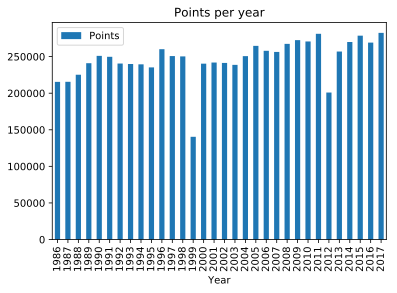

In [12]:
# 1. Обычное сравнение (Nominal comparison).
# Простое сравнение кол-ва набранных очков за сезон от года. Удобно смотреть. Как видим в 1999 и в 2012 есть отклонения,
# это,полагаю, было связано с локаутом в NBA
df_nominal = filtered_df.groupby('Year').sum()[['Points']]
df_nominal.plot(kind = 'bar',title = 'Points per year')

Text(0, 0.5, 'People')

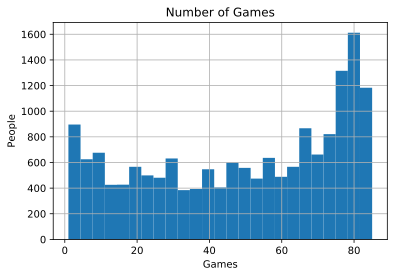

In [13]:
# 2.Количесвто игр - сколько человек провел
# Посмотрим на распределение сыгранных игр. Гистограммы  - графики,наиболее подходящие для распределений
# Из графика видно,например, что более 1600 человек провели 80 игр

ax = filtered_df['Games'].hist(bins = 25)
ax.set_title('Number of Games')
ax.set_xlabel('Games')
ax.set_ylabel('People')

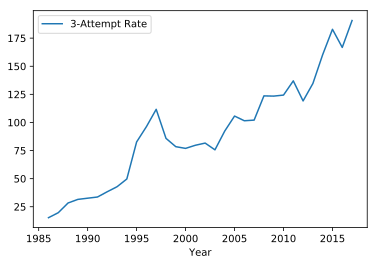

In [14]:
# 3. Time Series - изменение одной или нескольких метрик во времени. Чтобы подчеркнуть тренд 3-очковых бросков
# мы видим, тенденция 3-очковых бросков растет
points = filtered_df.groupby('Year').sum()[['3-Attempt Rate']]
points.plot()

In [15]:
# 4. Top игроков, с самым удачным True_sht_%(процент попадания)
# Такой метод "стилизации" таблицы , без участия графиков, наглядно показывает нужную метрику
# По таблице виден процент попадания в порядке убывания
top_players_df = filtered_df.groupby('Player')[['True_sht_%']].sum()\
    .sort_values('True_sht_%', ascending=False).head(10)
    

In [16]:
top_players_df.style.bar()

,True_sht_%
Player,
Nazr Mohammed,14.206
Andre Miller,13.502
Kevin Willis,13.109
Chauncey Billups,12.892
Juwan Howard,12.653
Theo Ratliff,12.563
Joe Smith,12.518
Kevin Garnett,12.393
Shaquille O'Neal*,12.35


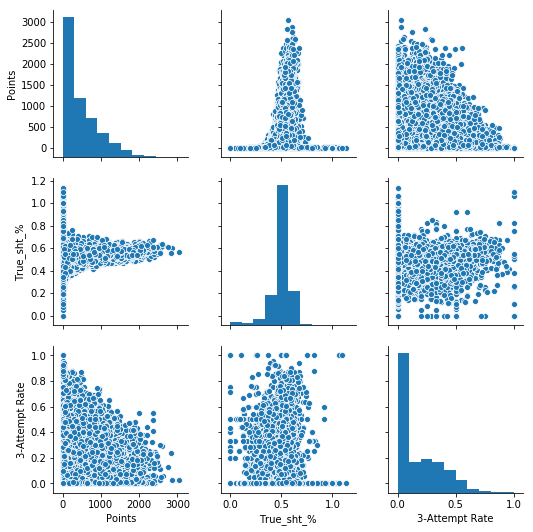

In [17]:
# 5.  pair plot (scatter plot matrix). 
#Эта визуализация поможет нам посмотреть на одной картинке, как связаны между собой различные признаки.
# Задача - показать, как связаны между собой очки, процент попадания и 3-очковые броски
# хм, возможно здесть не стоит отвергать криволинейную корреляцию между Points and True_sht_% (процент точных бросков)
# и между 3-очковыми бросками и очками возможна отрицательная корреляция(?)
%config InlineBackend.figure_format = 'png' 
sns_plot = sns.pairplot(
    filtered_df[['Points', 'True_sht_%', '3-Attempt Rate']]);
sns_plot.savefig('pairplot.png')

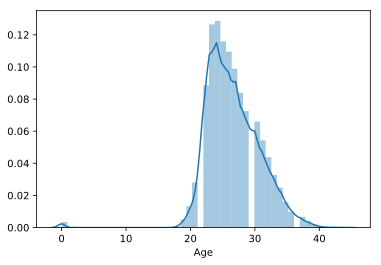

In [18]:
# 6. Посмотрим на распределение возраста игроков в Age. Для этого построим distplot. Удобно, т.к. сразу отображается
# график плотности распределения и гистограмма
# по графику можно сказать, что возраст ~24 года наиболее встречающейся

%config InlineBackend.figure_format = 'svg' 
sns.distplot(df.Age)

In [19]:

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode (connected=True)
    

In [20]:
filtered_df_2 = df1[(df1['Year']>1988)& (df1['Player'].str.contains('Michael Jordan'))]
filtered_df_2

,Year,Player,Age,Games,Min_Played,True_sht_%,3-Attempt Rate,Fouls,Points
9297,1989,Michael Jordan*,25,81,3255,0.614,0.055,247,2633
9747,1990,Michael Jordan*,26,82,3197,0.606,0.125,241,2753
10212,1991,Michael Jordan*,27,82,3034,0.605,0.051,229,2580
10666,1992,Michael Jordan*,28,80,3102,0.579,0.055,201,2404
11106,1993,Michael Jordan*,29,78,3067,0.564,0.115,188,2541
12048,1995,Michael Jordan*,31,17,668,0.493,0.079,47,457
12528,1996,Michael Jordan*,32,82,3090,0.582,0.141,195,2491
13096,1997,Michael Jordan*,33,82,3106,0.567,0.157,156,2431
13654,1998,Michael Jordan*,34,82,3181,0.533,0.067,151,2357
15751,2002,Michael Jordan*,38,60,2093,0.468,0.040,119,1375


In [21]:
# 7. Статистики Michael Jordan. График время на площадке - очки за игру
# Time Series - изменение одной или нескольких метрик во времени
#  По грфику удобно смотреть год - кол-во сыгранных минут - кол-во набранных очков в режиме интерактива
trace0 = go.Scatter( 
    x=filtered_df_2.Year,
    y=filtered_df_2.Points,
    name='Points'
)

trace1 = go.Scatter(
    x=filtered_df_2.Year,
    y=filtered_df_2.Min_Played,
    name='Minutes'
)

data = [trace0, trace1]
layout = {'title': 'Statistics of Michael Jordan'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

In [22]:
# 8. Статистики Top 15 players
# График отображает игрока и количесвто очков, которые он набрал за карьеру. График в режиме интерактива
# Видно, что Karle Malone вне досягаемости от преследователей
# также можно было было показать данную метрику на bar chat, поэтому был выбран этот
best_players = filtered_df.groupby('Player').sum()[['Points']].sort_values('Points',ascending = False).head(15)

In [23]:
def plotly_line_plot(df, title = ''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

In [24]:
plotly_line_plot(
    best_players,
    title = 'Points of Best Players'
)